In [13]:
import os
import logging
import sys

import numpy as np
from matplotlib import pyplot as plt

folder = os.path.realpath(".")

from utils.neuron_model import NeuronCell
from utils.neuron_viewer import plot_morphology_from_cell

In [4]:

def use_neurom_visualization(curr_path):
    # import within only if needed
    import matplotlib.pyplot as plt
    from neurom import load_morphology
    from neurom.view import matplotlib_impl as mpl_n

    nrn = load_morphology(curr_path)
    plt.close("all")
    mpl_n.plot_morph(nrn)                    # 2d plot
    plt.tight_layout()
    mpl_n.plot_morph3d(nrn)         # 3d plot
    plt.tight_layout()
    mpl_n.plot_tree(nrn.neurites[0])        # 2d plot of neurite tree
    plt.tight_layout()
    mpl_n.plot_dendrogram(nrn)  # dendrogram plot
    plt.tight_layout()
    plt.show()


def simulate(cell: NeuronCell, dt=0.1, delay_ms=200, dur_from_delay_ms=400, initial_voltage=-70):
    def get_recording_vectors():
        rec_time = h.Vector()
        rec_time.record(h._ref_t)
        # record soma voltage
        rec_voltage_soma = h.Vector()
        rec_voltage_soma.record(cell.soma(0.5)._ref_v)
        rec_voltage_all_segments, all_segments = [], []
        for indsec, section in enumerate(cell1.apical_sections + cell.basal_sections):
            for indseg, segment in enumerate(section):
                rec_voltage_seg = h.Vector()
                rec_voltage_seg.record(segment._ref_v)
                rec_voltage_all_segments.append(rec_voltage_seg)
                all_segments.append(segment)  # make sure we know what was recorded (keep order)
        return dict(time=rec_time, soma_v=rec_voltage_soma, recorded_segments=all_segments,
                    segments_v=rec_voltage_all_segments)

    from neuron import h
    from neuron.units import mV, ms

    h.dt = dt
    recorded_data = get_recording_vectors()
    h.finitialize(initial_voltage * mV)
    h.continuerun((delay_ms + dur_from_delay_ms) * ms)  # todo before interp this is 70 points for small dt
    for k, v in recorded_data.items():
        if k == "recorded_segments":
            recorded_data[k] = v
        else:
            if isinstance(v, list):
                recorded_data[k] = [np.array(iv.to_python()) for iv in v]
            else:
                recorded_data[k] = np.array(v.to_python())
    return recorded_data

ERROR:root:Missing dll/so mechanisms in C:\Users\sapir\PycharmProjects\NeuronQuickStart\L5PC_Mouse_model_example
NEURON: Im is not a MECHANISM
 in L5PCbiophys5b.hoc near line 37
   	insert Im 
            ^
        xopen("L5PCbiophy...")
      execute1("{xopen("L5...")
    load_file("C:\Users\s...")
INFO:root:Loading C:\Users\sapir\PycharmProjects\NeuronQuickStart\L5PC_Mouse_model_example\morphologies\cell1.ASC
INFO:root:Loaded morphologies\cell1.ASC
INFO:root:Done get_markers: [dict_keys(['diameters', 'label', 'points', 'section_id'])]


Done __init__
all L5PCtemplate[0].dend[0]
basal L5PCtemplate[0].dend[1]
basal L5PCtemplate[0].dend[2]
basal L5PCtemplate[0].dend[3]
basal L5PCtemplate[0].dend[4]
basal L5PCtemplate[0].dend[5]
basal L5PCtemplate[0].dend[6]
basal L5PCtemplate[0].dend[7]
basal L5PCtemplate[0].dend[8]
basal L5PCtemplate[0].dend[9]
basal L5PCtemplate[0].dend[10]
basal L5PCtemplate[0].dend[11]
basal L5PCtemplate[0].dend[12]
basal L5PCtemplate[0].dend[13]
basal L5PCtemplate[0].dend[14]
basal L5PCtemplate[0].dend[15]
basal L5PCtemplate[0].dend[16]
basal L5PCtemplate[0].dend[17]
basal L5PCtemplate[0].dend[18]
basal L5PCtemplate[0].dend[19]
basal L5PCtemplate[0].dend[20]
basal L5PCtemplate[0].dend[21]
basal L5PCtemplate[0].dend[22]
basal L5PCtemplate[0].dend[23]
basal L5PCtemplate[0].dend[24]
basal L5PCtemplate[0].dend[25]
basal L5PCtemplate[0].dend[26]
basal L5PCtemplate[0].dend[27]
basal L5PCtemplate[0].dend[28]
basal L5PCtemplate[0].dend[29]
basal L5PCtemplate[0].dend[30]
basal L5PCtemplate[0].dend[31]
basal 

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

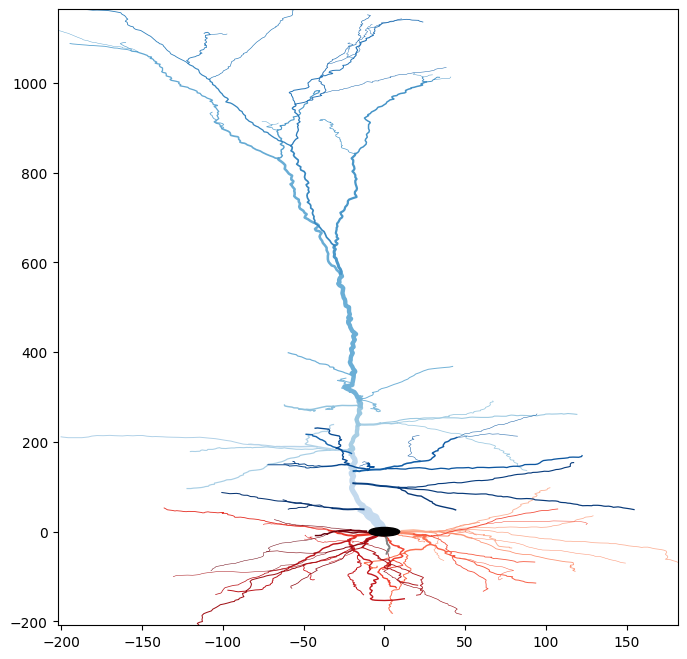

In [9]:
logging.basicConfig(level=logging.INFO)

# load neuron as cell (neuron h wrapper)
use_neurom = True  # if installed (pip install neurom)
curr_path = os.path.join(folder, "L5PC_Mouse_model_example", "morphologies", "cell1.swc")  # converted. Can also the asc
cell1 = NeuronCell(use_cvode=True,
                   morphologyFilename=os.path.join("morphologies", "cell1.ASC"),
                   model_path=os.path.join(folder, "L5PC_Mouse_model_example"))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_morphology_from_cell(ax, cell1, color_by_type=True, fontsize=8)
ax.axis('equal')
plt.tight_layout()
plt.show()



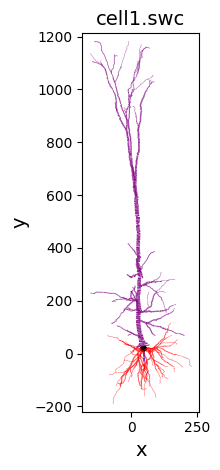

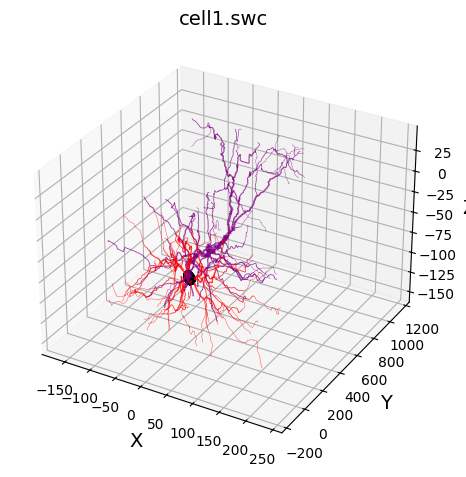

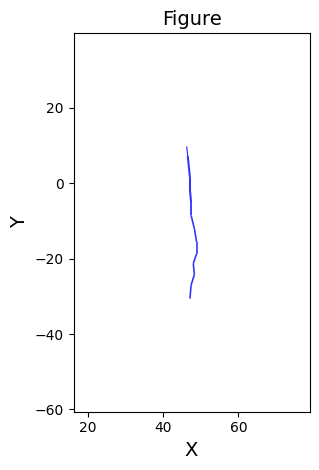

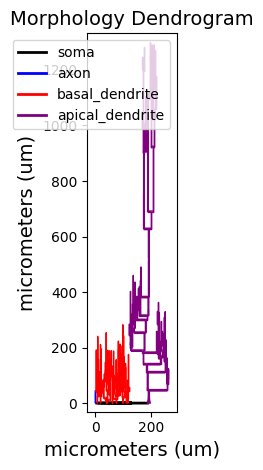

In [10]:
if use_neurom:
    use_neurom_visualization(curr_path)


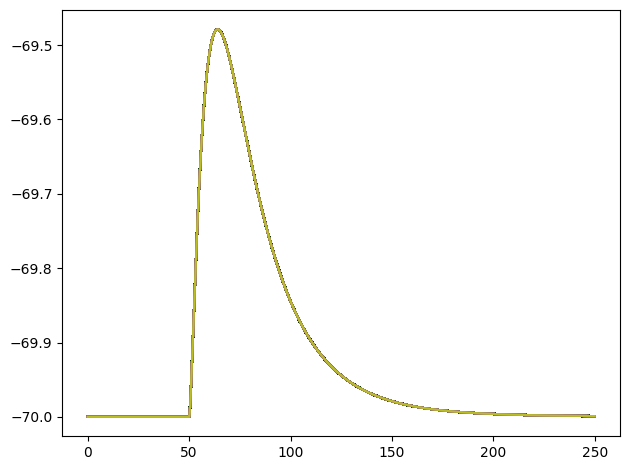

In [11]:
# add clamp and play and plot
cell1.init_passive_params()
cell1.change_passive_params(CM=1.2, RA=200, RM=22000.0, E_PAS=-70, SPINE_START=60, F_factor=1.9)
delay_ms = 50
dur_from_delay_ms = 200
cell1.add_alpha_current_stim(seg=cell1.soma(0.5), delay_ms=delay_ms, dur_from_delay_ms=dur_from_delay_ms)
recorded_data_traces = simulate(cell=cell1, dt=0.1, initial_voltage=-70,
                                delay_ms=delay_ms, dur_from_delay_ms=dur_from_delay_ms)
plt.figure()
plt.plot(recorded_data_traces["time"], recorded_data_traces["soma_v"], "--k")
for seg, seg_v in zip(recorded_data_traces["recorded_segments"], recorded_data_traces["segments_v"]):
    plt.plot(recorded_data_traces["time"], recorded_data_traces["soma_v"],
             label="{0}-{1}".format(seg.sec.name().split(".")[1], seg.x))
plt.tight_layout()
# plt.legend()
plt.show()

